In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn import preprocessing

Importing dataset

In [ ]:
balldata_08_21 = pd.read_csv(r"IPL_Ball_by_Ball_2008_2021.csv")
balldata_2022 = pd.read_csv(r"IPL_Ball_by_Ball_2022.csv")
matchdata_08_21 = pd.read_csv(r"IPL_Matches_2008_2021.csv")
matchdata_22 = pd.read_csv(r"IPL_Matches_2022.csv")

In [ ]:
matchdata_08_21.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [ ]:
matchdata_22.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1304105,Mumbai,2022-05-12,2022,59,Chennai Super Kings,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5,NaN,DR Sams,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'RV Utha...","['Ishan Kishan', 'RG Sharma', 'DR Sams', 'Tila...",Chirra Ravikanthreddy,CB Gaffaney
1,1304104,Navi Mumbai,2022-05-11,2022,58,Rajasthan Royals,Delhi Capitals,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,8,NaN,MR Marsh,"['YBK Jaiswal', 'JC Buttler', 'R Ashwin', 'D P...","['KS Bharat', 'DA Warner', 'MR Marsh', 'RR Pan...",NA Patwardhan,Nitin Menon
2,1304103,Pune,2022-05-10,2022,57,Gujarat Titans,Lucknow Super Giants,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,bat,N,Gujarat Titans,Runs,62,NaN,Shubman Gill,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['Q de Kock', 'KL Rahul', 'DJ Hooda', 'KS Shar...",KN Ananthapadmanabhan,MA Gough
3,1304102,Navi Mumbai,2022-05-09,2022,56,Kolkata Knight Riders,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",Mumbai Indians,field,N,Kolkata Knight Riders,Runs,52,NaN,JJ Bumrah,"['VR Iyer', 'AM Rahane', 'N Rana', 'SS Iyer', ...","['RG Sharma', 'Ishan Kishan', 'Tilak Varma', '...",CB Gaffaney,GR Sadashiv Iyer
4,1304101,Navi Mumbai,2022-05-08,2022,55,Chennai Super Kings,Delhi Capitals,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,field,N,Chennai Super Kings,Runs,91,NaN,DP Conway,"['RD Gaikwad', 'DP Conway', 'S Dube', 'AT Rayu...","['DA Warner', 'KS Bharat', 'MR Marsh', 'RR Pan...",Nitin Menon,R Pandit


# Combining both datasets

```
# This is formatted as code
```



In [ ]:
combined_ball_data = pd.concat([balldata_08_21,balldata_2022],axis=0)
combined_match_data  = pd.concat([matchdata_08_21,matchdata_22],axis=0).drop_duplicates().reset_index(drop=True)

In [ ]:
combined_ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


In [ ]:
combined_match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


# EDA

In [ ]:
print("Matches played at :", combined_match_data["City"].unique())
print("\n Teams Participated :", combined_match_data["Team1"].unique())
print("\n Matches played so far: ",combined_match_data.shape[0])

Matches played at : ['Dubai' 'Sharjah' 'Abu Dhabi' 'Ahmedabad' 'Delhi' 'Chennai' 'Mumbai' nan
 'Hyderabad' 'Visakhapatnam' 'Chandigarh' 'Bengaluru' 'Kolkata' 'Jaipur'
 'Pune' 'Indore' 'Bangalore' 'Kanpur' 'Rajkot' 'Raipur' 'Ranchi' 'Cuttack'
 'Dharamsala' 'Kochi' 'Nagpur' 'Johannesburg' 'Centurion' 'Durban'
 'Bloemfontein' 'Port Elizabeth' 'Kimberley' 'East London' 'Cape Town'
 'Navi Mumbai']

 Teams Participated : ['Chennai Super Kings' 'Delhi Capitals' 'Royal Challengers Bangalore'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Punjab Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Gujarat Titans'
 'Lucknow Super Giants']

 Matches played so far:  935


In [ ]:
combined_match_data['Season']=pd.DatetimeIndex(combined_match_data["Date"]).year
combined_match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [ ]:
#Total nmumber of matches player per season

matches_per_season=combined_match_data.groupby(["Season"])["ID"].count().reset_index().rename(columns={"ID":"Matches"})
print(matches_per_season)

    Season  Matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2020       60
13    2021       60
14    2022       59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


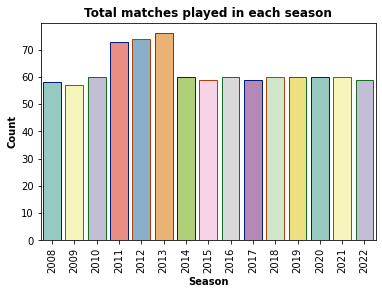

In [ ]:
sns.countplot(combined_match_data["Season"],palette="Set3",edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Total matches played in each season", fontsize=12,fontweight="bold")
plt.show()

In [ ]:
winning_team=combined_match_data.groupby(["WinningTeam"])["ID"].count().reset_index().rename(columns={"ID":"Matches Won"})
print(winning_team)

                    WinningTeam  Matches Won
0           Chennai Super Kings          121
1               Deccan Chargers           29
2                Delhi Capitals           35
3              Delhi Daredevils           67
4                 Gujarat Lions           13
5                Gujarat Titans            9
6               Kings XI Punjab           88
7          Kochi Tuskers Kerala            6
8         Kolkata Knight Riders          113
9          Lucknow Super Giants            8
10               Mumbai Indians          130
11                Pune Warriors           12
12                 Punjab Kings           11
13             Rajasthan Royals           93
14       Rising Pune Supergiant           10
15      Rising Pune Supergiants            5
16  Royal Challengers Bangalore          107
17          Sunrisers Hyderabad           74


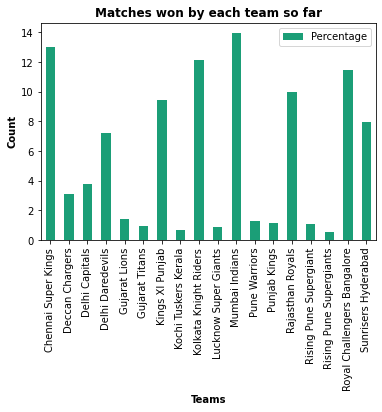

In [ ]:
winning_team["Percentage"]=((winning_team["Matches Won"]/winning_team["Matches Won"].sum())*100).sort_values()
winning_team.plot(x="WinningTeam",y="Percentage",kind='bar', colormap = 'Dark2')
plt.xlabel("Teams", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Matches won by each team so far", fontsize=12,fontweight="bold")
plt.show()

In [ ]:
venue=combined_match_data[["Venue","Team1","Team2","TossWinner","TossDecision","WinningTeam"]]
venue["TossLosser"]=combined_match_data["Team1"]
venue.loc[venue["TossWinner"]!=venue["Team1"],"TossLosser"]=venue["Team1"]
venue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,TossLosser
0,Dubai International Cricket Stadium,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,Chennai Super Kings,Chennai Super Kings
1,Sharjah Cricket Stadium,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Delhi Capitals
2,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Kolkata Knight Riders,Royal Challengers Bangalore
3,Dubai International Cricket Stadium,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,Delhi Capitals
4,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,Mumbai Indians
...,...,...,...,...,...,...,...
930,"Maharashtra Cricket Association Stadium, Pune",Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Rajasthan Royals,Rajasthan Royals
931,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,Lucknow Super Giants
932,"Dr DY Patil Sports Academy, Mumbai",Royal Challengers Bangalore,Punjab Kings,Punjab Kings,field,Punjab Kings,Royal Challengers Bangalore
933,"Brabourne Stadium, Mumbai",Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,Mumbai Indians


In [ ]:
venue.loc[venue["TossDecision"]=="bat","BattingTeam"]=venue["TossWinner"]
venue.loc[venue["TossDecision"]=="field","BattingTeam"]=venue["TossLosser"]
venue=venue.drop(columns=["Team1","Team2","TossDecision","TossWinner","TossLosser"])
venue.loc[venue["WinningTeam"]==venue["BattingTeam"],"BattingWin"]=1
venue.loc[venue["WinningTeam"]!=venue["BattingTeam"],"BattingWin"]=0
venue

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Venue,WinningTeam,BattingTeam,BattingWin
0,Dubai International Cricket Stadium,Chennai Super Kings,Chennai Super Kings,1.0
1,Sharjah Cricket Stadium,Kolkata Knight Riders,Delhi Capitals,0.0
2,Sharjah Cricket Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0.0
3,Dubai International Cricket Stadium,Chennai Super Kings,Delhi Capitals,0.0
4,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Mumbai Indians,1.0
...,...,...,...,...
930,"Maharashtra Cricket Association Stadium, Pune",Rajasthan Royals,Rajasthan Royals,1.0
931,"Wankhede Stadium, Mumbai",Gujarat Titans,Lucknow Super Giants,0.0
932,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,Royal Challengers Bangalore,0.0
933,"Brabourne Stadium, Mumbai",Delhi Capitals,Mumbai Indians,0.0


In [ ]:
batting_win=venue[venue["BattingWin"]==1]
batting_win=batting_win.drop(columns=["BattingWin"])
batting_losses=venue[venue["BattingWin"]==0]
batting_losses=batting_losses.drop(columns=["BattingWin"])
batting_win

,Venue,WinningTeam,BattingTeam
0,Dubai International Cricket Stadium,Chennai Super Kings,Chennai Super Kings
4,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,Mumbai Indians
6,Sharjah Cricket Stadium,Kolkata Knight Riders,Kolkata Knight Riders
8,"Zayed Cricket Stadium, Abu Dhabi",Sunrisers Hyderabad,Sunrisers Hyderabad
12,Sharjah Cricket Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...,...
923,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,Lucknow Super Giants
924,"Brabourne Stadium, Mumbai",Punjab Kings,Punjab Kings
925,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,Gujarat Titans
926,"Dr DY Patil Sports Academy, Mumbai",Rajasthan Royals,Rajasthan Royals


In [ ]:
x=batting_win.groupby("Venue")["Venue"].count()
y=batting_losses.groupby("Venue")["Venue"].count()

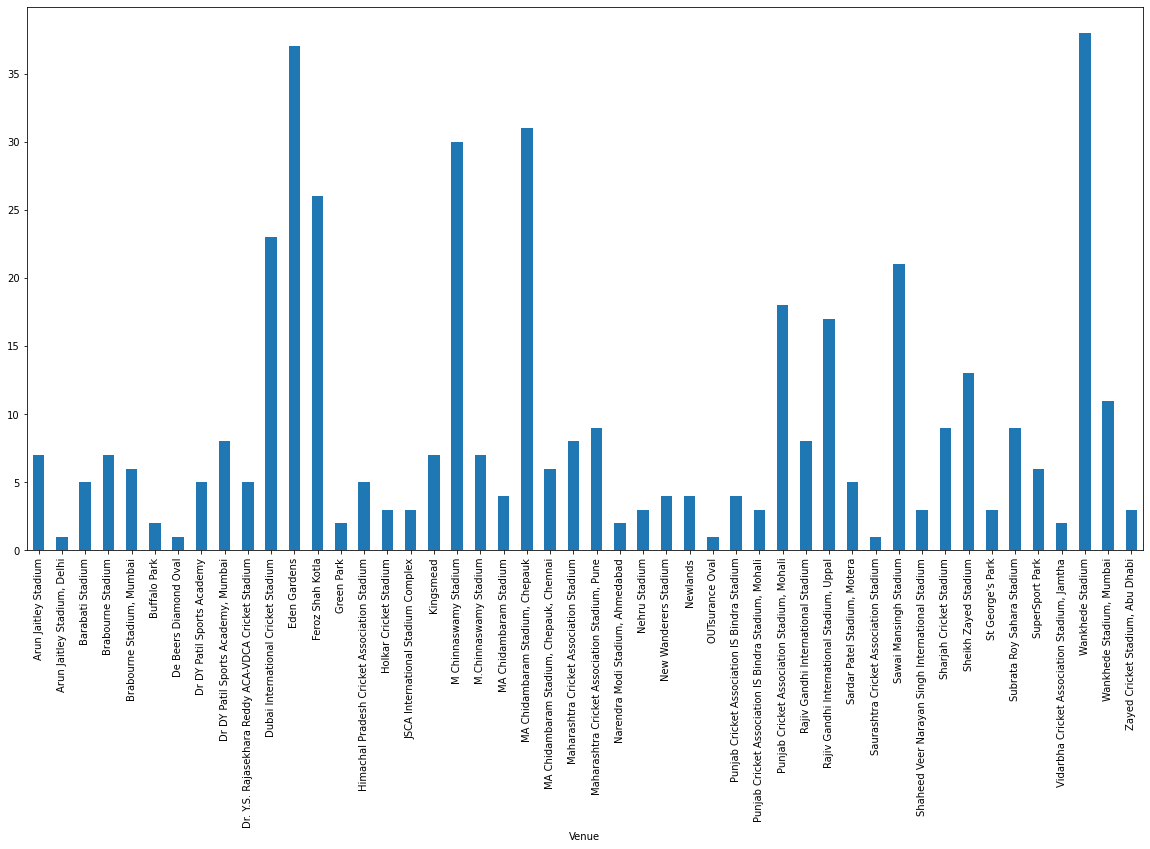

In [ ]:
plt.figure(figsize=(20,10))
batting_win.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import cv2

In [ ]:
combined_match_data.Venue[combined_match_data.WonBy != "Wickets"].mode()

0    Wankhede Stadium
dtype: object

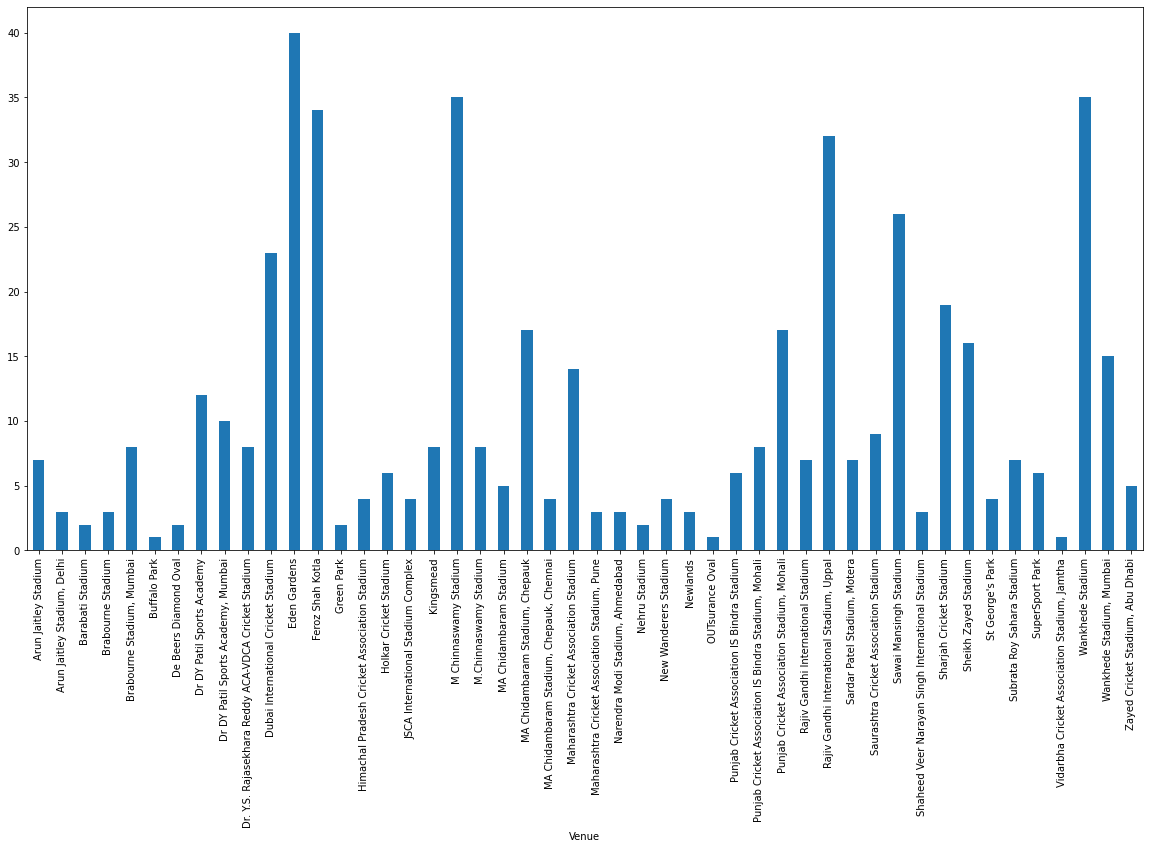

In [ ]:
plt.figure(figsize=(20,10))
batting_losses.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
combined_match_data.Venue[combined_match_data.WonBy != "Runs"].mode()

0    Eden Gardens
dtype: object

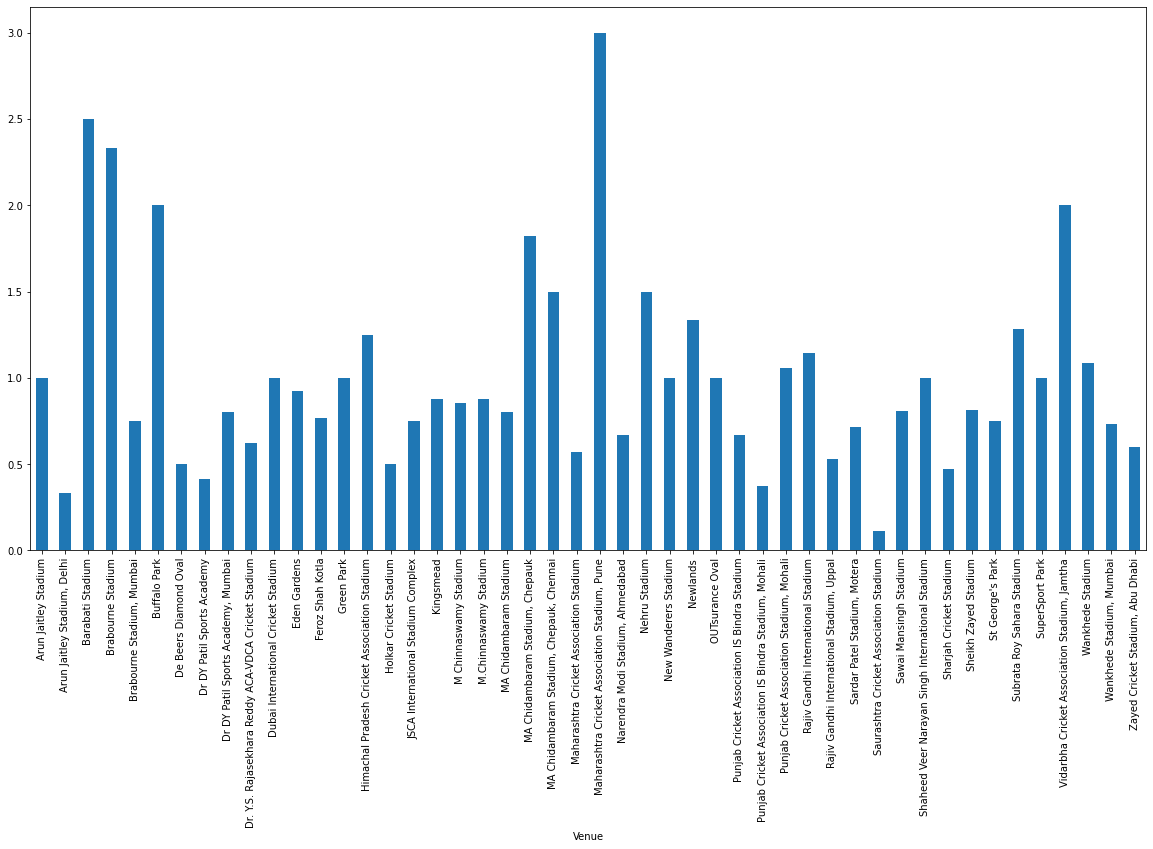

In [ ]:
z=x/y
z=z.dropna()
plt.figure(figsize=(20,10))
z.plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

# players

In [ ]:
player=combined_match_data[["Team1","Team2","Player_of_Match","Team1Players","Team2Players"]]
player

,Team1,Team2,Player_of_Match,Team1Players,Team2Players
0,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari..."
1,Delhi Capitals,Kolkata Knight Riders,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip..."
2,Royal Challengers Bangalore,Kolkata Knight Riders,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ..."
3,Delhi Capitals,Chennai Super Kings,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '..."
4,Mumbai Indians,Sunrisers Hyderabad,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo..."
...,...,...,...,...,...
930,Rajasthan Royals,Sunrisers Hyderabad,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa..."
931,Lucknow Super Giants,Gujarat Titans,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P..."
932,Royal Challengers Bangalore,Punjab Kings,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L..."
933,Mumbai Indians,Delhi Capitals,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR..."


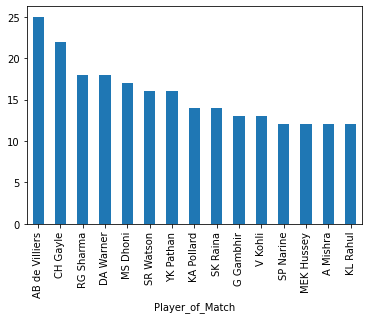

In [ ]:
player_of_match=player.groupby("Player_of_Match")["Player_of_Match"].count().sort_values(ascending=False)
player_of_match[:15].plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

# runs in each season

In [ ]:
season_data=combined_match_data[["ID","Season"]].merge(combined_ball_data,left_on="ID",right_on="ID", how="left").drop("ID", axis=1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2021,1.0,0.0,1.0,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1,2021,1.0,0.0,2.0,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
2,2021,1.0,0.0,3.0,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
3,2021,1.0,0.0,4.0,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
4,2021,1.0,0.0,5.0,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


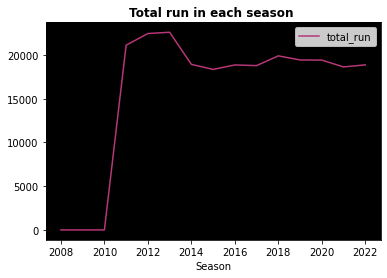

In [ ]:
season=season_data.groupby(["Season"])["total_run"].sum().reset_index()
p=season.set_index("Season")
ax=plt.axes()
ax.set(facecolor="black")

sns.lineplot(data=p,palette="magma")
plt.title("Total run in each season ", fontsize=12, fontweight="bold")
plt.show()

In [ ]:
run_per_season=pd.concat([matches_per_season,season.iloc[:,1]],axis=1)
run_per_season["Runs Scored per match"]=run_per_season["total_run"]/run_per_season["Matches"]
run_per_season.set_index("Season",inplace=True)
run_per_season

,Matches,total_run,Runs Scored per match
Season,,,
2008,58,0.0,0.000000
2009,57,0.0,0.000000
2010,60,0.0,0.000000
2011,73,21125.0,289.383562
2012,74,22453.0,303.418919
2013,76,22602.0,297.394737
2014,60,18931.0,315.516667
2015,59,18353.0,311.067797
2016,60,18862.0,314.366667


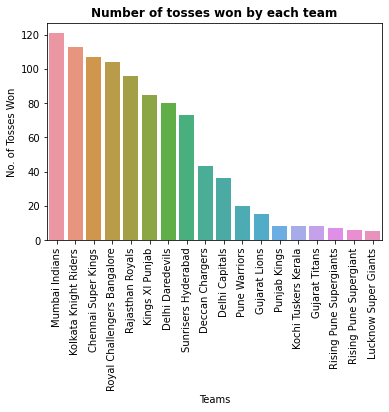

In [ ]:
toss=combined_match_data["TossWinner"].value_counts()
sns.barplot(x=toss.index,y=toss)
plt.title("Number of tosses won by each team",fontsize=12,fontweight="bold")
plt.xlabel("Teams")
plt.ylabel("No. of Tosses Won")
plt.xticks(rotation='vertical')
plt.show()

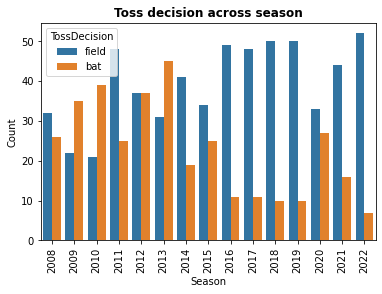

In [ ]:
sns.countplot(x="Season",hue="TossDecision",data=combined_match_data)
plt.xticks(rotation='vertical')
plt.title("Toss decision across season",fontsize=12,fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

# Decision about winning teams

In [ ]:
combined_match_data["WonBy"].value_counts()

Wickets      501
Runs         416
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

In [ ]:
teams=combined_match_data["Team1"].unique()

In [ ]:
teams1=teams[:14][:]
teams1=np.append(teams1,(teams[15][:]))
teams1

array(['Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [ ]:
"""
team=pd.DataFrame(columns=["Team","Stadium"])
for i in teams1:
  x=statistics.mode(combined_match_data.Venue[combined_match_data.WinningTeam== i])
  #team=team.append({'Team': i , "Stadium":matches.Venue[matches.WinningTeam== i].mode()}, ignore_index=True)
  print(i,":",x)


"""

'\nteam=pd.DataFrame(columns=["Team","Stadium"])\nfor i in teams1:\n  x=statistics.mode(combined_match_data.Venue[combined_match_data.WinningTeam== i])\n  #team=team.append({\'Team\': i , "Stadium":matches.Venue[matches.WinningTeam== i].mode()}, ignore_index=True)\n  print(i,":",x)\n\n\n'

In [ ]:
combined_match_data.Venue[combined_match_data.WinningTeam== "Deccan Chargers"].mode()

0                             Barabati Stadium
1    Rajiv Gandhi International Stadium, Uppal
dtype: object

In [ ]:
combined_match_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough


In [ ]:
combined_match_data.WinningTeam[combined_match_data.WonBy!='Runs'].mode()

0    Kolkata Knight Riders
dtype: object

In [ ]:
combined_match_data.WinningTeam[combined_match_data.WonBy!='Wickets'].mode()

0    Mumbai Indians
dtype: object

In [ ]:
seasons=combined_match_data["Season"].unique()
seasons

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2022])

In [ ]:
for i in range(2016,2022):
    x=statistics.mode(combined_match_data.WinningTeam[combined_match_data.Season== i])
   
    print(i,":",x)

2016 : Sunrisers Hyderabad
2017 : Mumbai Indians
2018 : Chennai Super Kings
2019 : Mumbai Indians
2020 : Mumbai Indians
2021 : Chennai Super Kings


In [ ]:
seasons1=seasons[:1][:]
seasons1=np.append(seasons1,(seasons[2:4][:]))
seasons1=np.append(seasons1,(seasons[5:][:]))
for i in seasons1:
    x=statistics.mode(combined_match_data.Player_of_Match[combined_match_data.Season== i])
    
    print(i,":",x)

2021 : RD Gaikwad
2019 : AD Russell
2018 : Rashid Khan
2016 : V Kohli
2015 : DA Warner
2014 : GJ Maxwell
2013 : MEK Hussey
2012 : CH Gayle
2011 : CH Gayle
2010 : SR Tendulkar
2009 : YK Pathan
2008 : SE Marsh
2022 : Kuldeep Yadav


In [ ]:
print(combined_match_data.Player_of_Match[combined_match_data.Season== 2022].mode())

0    Kuldeep Yadav
dtype: object


In [ ]:
print(combined_match_data.Player_of_Match[combined_match_data.Season== 2017].mode())

0          BA Stokes
1    NM Coulter-Nile
dtype: object


In [ ]:
toss=(combined_match_data["TossWinner"]==combined_match_data["WinningTeam"])
toss.mode()

0    True
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


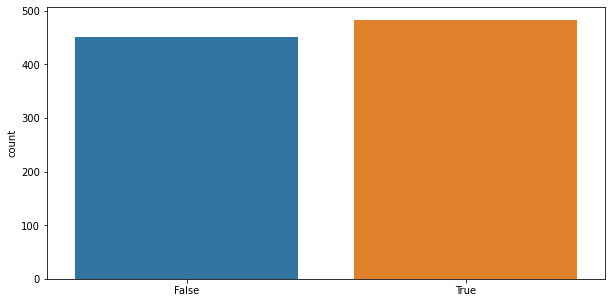

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


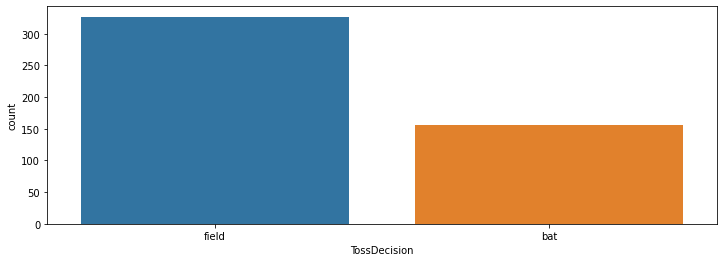

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(combined_match_data.TossDecision[combined_match_data.TossWinner==combined_match_data.WinningTeam])
plt.show()

In [ ]:
Player=(combined_ball_data['batter']=='SK Raina')
#Player2=(balls['bowler']=='SK Raina')

df_raina=combined_ball_data[Player]
#df_raina.append(balls[Player2])
df_raina.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1205,1254113,2,14,2,SK Raina,YS Chahal,AT Rayudu,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1206,1254113,2,14,3,SK Raina,YS Chahal,AT Rayudu,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1208,1254113,2,14,5,SK Raina,YS Chahal,AT Rayudu,NaN,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1209,1254113,2,14,6,SK Raina,YS Chahal,AT Rayudu,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1218,1254113,2,16,3,SK Raina,PWH de Silva,MS Dhoni,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


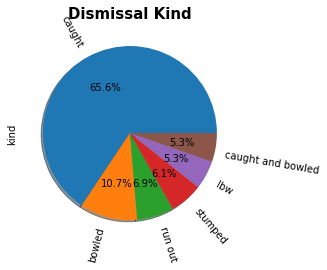

In [ ]:
df_raina['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontsize=15,fontweight="bold")
plt.show()

In [ ]:
def count(df_raina,runs):
    return len(df_raina['batsman_run']==runs)*runs
print("Runs scored for 1's : ", count(df_raina,1))
print("Runs scored for 2's : ", count(df_raina,2))
print("Runs scored for 3's : ", count(df_raina,3))
print("Runs scored for 4's : ", count(df_raina,4))
print("Runs scored for 6's : ", count(df_raina,6))

Runs scored for 1's :  3168
Runs scored for 2's :  6336
Runs scored for 3's :  9504
Runs scored for 4's :  12672
Runs scored for 6's :  19008


In [ ]:
combined_match_data[combined_match_data["Margin"]==combined_match_data["Margin"].max()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
256,1082635,Delhi,2017-05-06,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,NaN,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


In [ ]:
combined_ball_data.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


In [ ]:
runs=combined_ball_data.groupby(["batter"])["batsman_run"].sum().sort_values(ascending=False).reset_index()
runs.columns=["Batsman","Runs"]
y=runs.head(10)
y

,Batsman,Runs
0,V Kohli,5791.0
1,S Dhawan,5594.0
2,DA Warner,5381.0
3,RG Sharma,4643.0
4,CH Gayle,4521.0
5,AB de Villiers,4510.0
6,SK Raina,4153.0
7,RV Uthappa,4084.0
8,AM Rahane,3898.0
9,MS Dhoni,3876.0


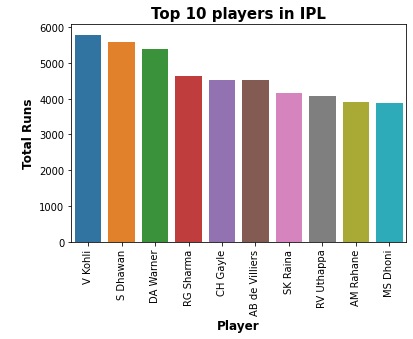

In [ ]:
sns.barplot(x=y["Batsman"],y=y["Runs"])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Player',fontsize=12,fontweight="bold")
plt.ylabel('\nTotal Runs',fontsize=12,fontweight="bold")
plt.title("Top 10 players in IPL", fontsize=15, fontweight="bold")
plt.show()

In [ ]:
runs_per_season=season_data.groupby(["batter","Season"])["batsman_run"].sum().sort_values(ascending=False).reset_index()
runs_per_season

,batter,Season,batsman_run
0,V Kohli,2016,973.0
1,DA Warner,2016,848.0
2,KS Williamson,2018,735.0
3,CH Gayle,2012,733.0
4,MEK Hussey,2013,733.0
...,...,...,...
1788,R Vinay Kumar,2015,0.0
1789,JL Denly,2019,0.0
1790,Anuj Rawat,2021,0.0
1791,JJ Bumrah,2022,0.0


In [ ]:
combined_ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


In [ ]:
runs = combined_ball_data.groupby(['batter'])['batsman_run'].sum().reset_index()
runs.columns = ['Batsman','runs']
y = runs.sort_values(by='runs', ascending=False).head(10).reset_index().drop('index', axis=1)
y

,Batsman,runs
0,V Kohli,5791.0
1,S Dhawan,5594.0
2,DA Warner,5381.0
3,RG Sharma,4643.0
4,CH Gayle,4521.0
5,AB de Villiers,4510.0
6,SK Raina,4153.0
7,RV Uthappa,4084.0
8,AM Rahane,3898.0
9,MS Dhoni,3876.0


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

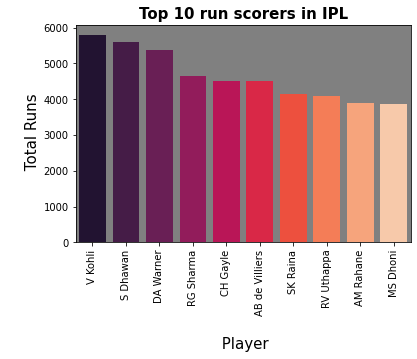

In [ ]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.barplot(x=y['Batsman'],y=y['runs'], palette = 'rocket',saturation=1)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize = 15)
plt.ylabel('\n Total Runs', fontsize=15)
plt.title('Top 10 run scorers in IPL', fontsize=15, fontweight = "bold")

In [ ]:
combined_ball_data['BattingTeam'].unique()

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Rajasthan Royals', 'Punjab Kings', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan, 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [ ]:
def change_team_name(x):
    if x=='Deccan Chargers':
        return 'Sunrisers Hyderabad'
    elif x=='Pune Warriors' or x=='Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    elif x=='Delhi Daredevils':
        return 'Delhi Capitals'
    elif x=='Kings XI Punjab':
        return 'Punjab Kings'
    elif x=='Gujarat Lions':
        return 'Gujarat Titans'
    else:
        return x
combined_ball_data['BattingTeam']=combined_ball_data['BattingTeam'].apply(change_team_name)
combined_match_data['Team1']=combined_match_data['Team1'].apply(change_team_name)
combined_match_data['Team2']=combined_match_data['Team2'].apply(change_team_name)
combined_match_data['TossWinner']=combined_match_data['TossWinner'].apply(change_team_name)
combined_match_data['WinningTeam']=combined_match_data['WinningTeam'].apply(change_team_name)

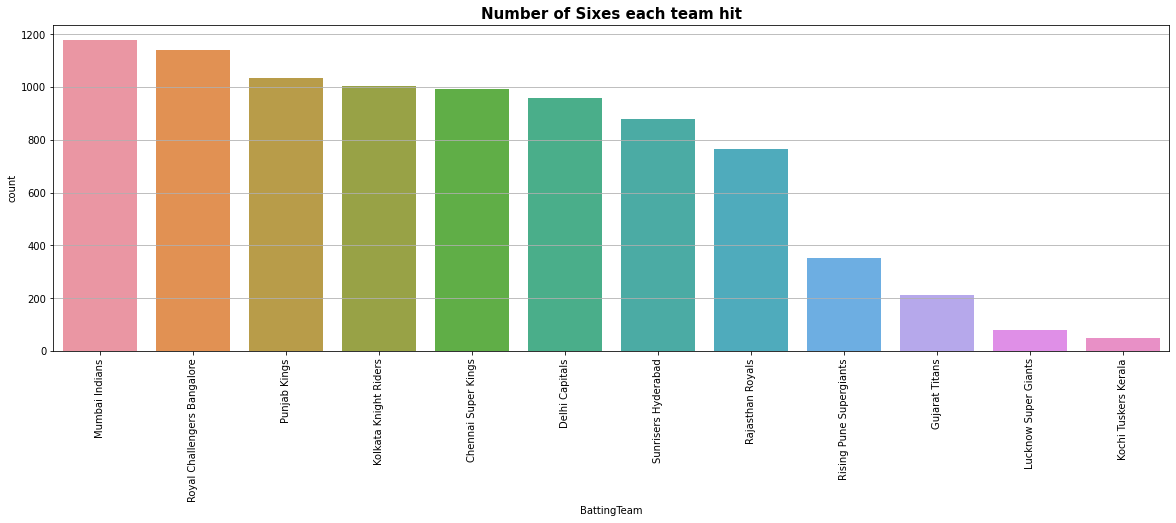

In [ ]:
plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)
plt.title('Number of Sixes each team hit',size=15,fontweight='bold')
plt.grid(visible=True)
ord=list(combined_ball_data[combined_ball_data['total_run']==6]['BattingTeam'].value_counts().index)
sns.countplot(data=combined_ball_data[combined_ball_data['total_run']==6],x='BattingTeam',order=ord)

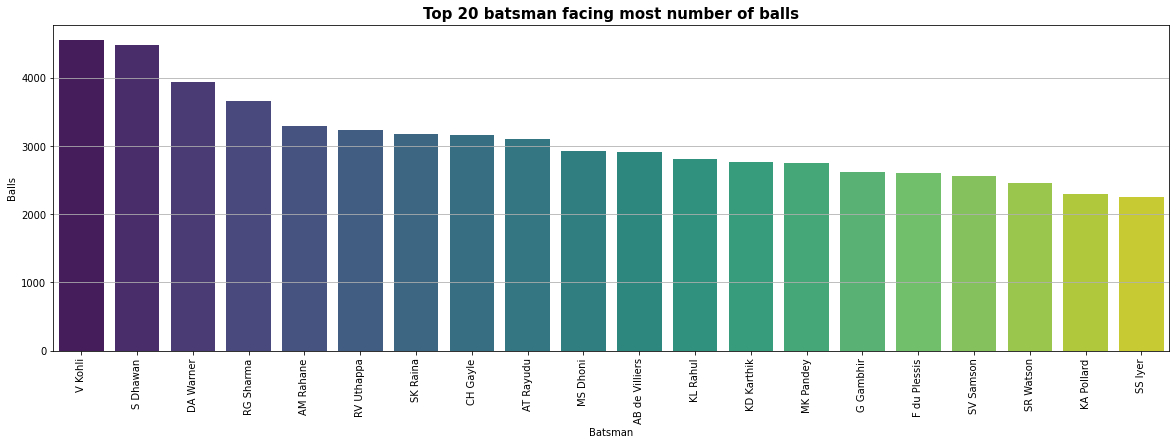

In [ ]:
d={'Batsman':(list(combined_ball_data['batter'].value_counts().index)),'Balls':(combined_ball_data['batter'].value_counts())}
ballsfaced=pd.DataFrame(data=d)
ballsfaced.reset_index(inplace=True,drop=True)
plt.figure(figsize=(20,6))
plt.title('Top 20 batsman facing most number of balls',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
sns.barplot(data=ballsfaced.head(20),x='Batsman',y='Balls',palette='viridis')

[Text(0, 0.5, 'Total Run Scored'), Text(0.5, 0, 'Batter')]

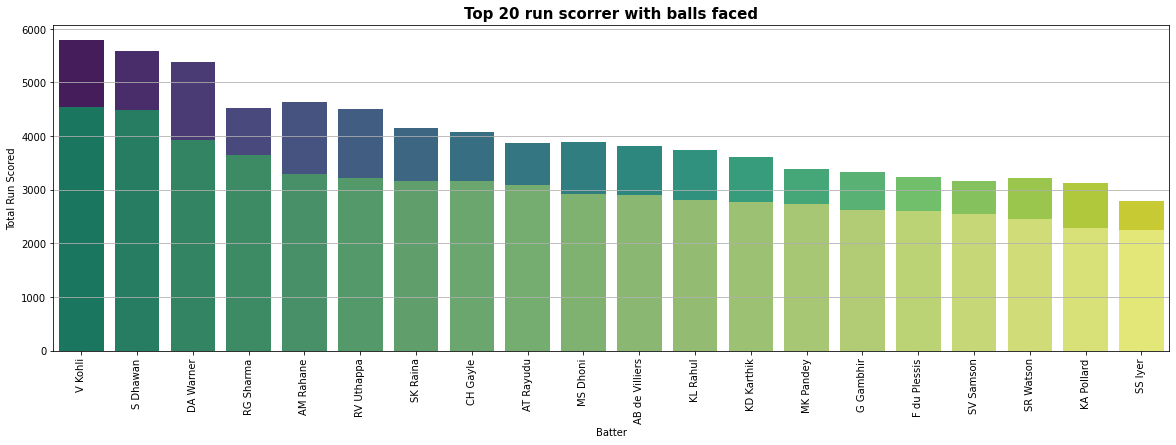

In [ ]:
run_scored=combined_ball_data.groupby('batter').sum()
run_scored.reset_index(inplace=True)
fig=plt.figure(figsize=(20,6))
plt.title('Top 20 run scorrer with balls faced',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)
ax=sns.barplot(data=run_scored.sort_values('total_run',ascending=False).head(20)
               ,x='batter',y='batsman_run',palette='viridis')
bx=sns.barplot(data=ballsfaced.head(20),x='Batsman',
            y='Balls',palette="summer",ax=ax)
bx.set(xlabel='Batter', ylabel='Total Run Scored')

In [ ]:
balldata_08_21.head(2)


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


In [ ]:
balldata_2022.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304103,1,0,1,WP Saha,Mohsin Khan,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
1,1304103,1,0,2,WP Saha,Mohsin Khan,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [ ]:
combined_match_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough


In [ ]:
#batting team, bowling team, city , run lft, ball left, wicket left, total runs, crr, rrr, result

In [ ]:
combined_ball_data.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [ ]:
total_score_df = combined_ball_data.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score_df.head()

,ID,innings,total_run
0,501198,1,153.0
1,501198,2,122.0
2,501199,1,137.0
3,501199,2,141.0
4,501200,1,161.0


In [ ]:
total_score_df = total_score_df[total_score_df['innings']==1]
total_score_df.head()

,ID,innings,total_run
0,501198,1,153.0
2,501199,1,137.0
4,501200,1,161.0
6,501201,1,95.0
8,501202,1,112.0


In [ ]:
match_df = combined_match_data.merge(total_score_df[['ID','total_run']],left_on='ID', right_on='ID')
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth,192.0
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,...,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough,135.0
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,...,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma,138.0
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,...,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth,172.0
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,...,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma,235.0


In [ ]:
match_df.dtypes

ID                   int64
City                object
Date                object
Season               int64
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin             float64
method              object
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
total_run          float64
dtype: object

In [ ]:
merged_dataset = pd.merge(combined_ball_data,combined_match_data, on="ID")

In [ ]:
merged_dataset.drop(["City","Date","Season","MatchNumber","Team1","TossWinner","TossDecision","SuperOver","WinningTeam","WonBy","Margin","method","Player_of_Match","Team1Players","Team2Players","Umpire1","Umpire2"],axis = 1,inplace=True)
merged_dataset.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Team2,Venue
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium


In [ ]:
merged_dataset.rename(columns = {"Team2":"BowlingTeam"}, inplace=True)
merged_dataset.head(2)


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,Venue
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium


In [ ]:
merged_dataset.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'BowlingTeam', 'Venue'],
      dtype='object')

In [ ]:
match_df.rename(columns = {"Team1":"BattingTeam","Team2":"BowlingTeam"}, inplace=True)
match_df.drop(['Team1Players','Team2Players','Umpire1','Umpire2','Player_of_Match'],axis=1,inplace=True)
match_df.head(2)

,ID,City,Date,Season,MatchNumber,BattingTeam,BowlingTeam,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,total_run
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,192.0
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,135.0


In [ ]:
new= pd.merge(match_df,combined_ball_data,on = "ID")
new.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'BattingTeam_x',
       'BowlingTeam', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver',
       'WinningTeam', 'WonBy', 'Margin', 'method', 'total_run_x', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam_y'],
      dtype='object')

In [ ]:
new.drop(['BattingTeam_y','total_run_y','Margin'],axis =1, inplace = True)

In [ ]:
new.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'BattingTeam_x',
       'BowlingTeam', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver',
       'WinningTeam', 'WonBy', 'method', 'total_run_x', 'innings', 'overs',
       'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'non_boundary', 'isWicketDelivery',
       'player_out', 'kind', 'fielders_involved'],
      dtype='object')

In [ ]:
new.rename(columns = {'BattingTeam_x':'BattingTeam','total_run_x':'total_run'},inplace = True)
new.head()

,ID,City,Date,Season,MatchNumber,BattingTeam,BowlingTeam,Venue,TossWinner,TossDecision,...,bowler,non-striker,extra_type,batsman_run,extras_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Shakib Al Hasan,RD Gaikwad,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Shakib Al Hasan,RD Gaikwad,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,NaN,4.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
str_cols = new.columns[new.dtypes==object]
new[str_cols] = new[str_cols].fillna('.')

In [ ]:
new_data = new.dropna(axis = 0, how ='any')

In [ ]:
new_data.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
BattingTeam          0
BowlingTeam          0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
method               0
total_run            0
innings              0
overs                0
ballnumber           0
batter               0
bowler               0
non-striker          0
extra_type           0
batsman_run          0
extras_run           0
non_boundary         0
isWicketDelivery     0
player_out           0
kind                 0
fielders_involved    0
dtype: int64

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [ ]:
new_data['Venue']= label_encoder.fit_transform(new_data['Venue'])
  
new_data['Venue'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 8, 33, 38, 22,  1, 19, 37, 34, 27,  7, 17, 36, 24, 16,  0,  9, 31,
       20, 13, 28, 15, 10, 11, 25, 30, 32, 14,  3, 26, 18, 29,  2, 35, 12,
        5, 23, 21,  6,  4])

In [ ]:
new_data.head(10)

,ID,City,Date,Season,MatchNumber,BattingTeam,BowlingTeam,Venue,TossWinner,TossDecision,...,bowler,non-striker,extra_type,batsman_run,extras_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,.,1.0,0.0,0.0,0.0,.,.,.
1,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shakib Al Hasan,RD Gaikwad,.,0.0,0.0,0.0,0.0,.,.,.
2,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shakib Al Hasan,RD Gaikwad,.,1.0,0.0,0.0,0.0,.,.,.
3,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,.,4.0,0.0,0.0,0.0,.,.,.
4,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,.,0.0,0.0,0.0,0.0,.,.,.
5,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shakib Al Hasan,F du Plessis,.,0.0,0.0,0.0,0.0,.,.,.
6,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shivam Mavi,RD Gaikwad,.,0.0,0.0,0.0,0.0,.,.,.
7,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shivam Mavi,RD Gaikwad,.,1.0,0.0,0.0,0.0,.,.,.
8,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shivam Mavi,F du Plessis,.,2.0,0.0,0.0,0.0,.,.,.
9,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,8,Kolkata Knight Riders,field,...,Shivam Mavi,F du Plessis,.,0.0,0.0,0.0,0.0,.,.,.


In [ ]:
new_data['BattingTeam']= label_encoder.fit_transform(new_data['BattingTeam'])
new_data['BattingTeam'].unique()
new_data['BowlingTeam']= label_encoder.fit_transform(new_data['BowlingTeam'])
new_data['BowlingTeam'].unique()
new_data['TossDecision']= label_encoder.fit_transform(new_data['TossDecision'])
new_data['TossDecision'].unique()
new_data['TossWinner']= label_encoder.fit_transform(new_data['TossWinner'])
new_data['TossWinner'].unique()
new_data['WinningTeam']= label_encoder.fit_transform(new_data['WinningTeam'])
new_data['WinningTeam'].unique()
new_data['City']= label_encoder.fit_transform(new_data['City'])
new_data['City'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

array([10, 23,  1,  2,  8,  6, 17,  0, 11, 24,  5,  4, 16, 13, 19, 12,  3,
       14, 21, 20, 22,  7,  9, 15, 18])

In [ ]:
new_data.head(20)

,ID,City,Date,Season,MatchNumber,BattingTeam,BowlingTeam,Venue,TossWinner,TossDecision,...,bowler,non-striker,extra_type,batsman_run,extras_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved
0,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shakib Al Hasan,F du Plessis,.,1.0,0.0,0.0,0.0,.,.,.
1,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shakib Al Hasan,RD Gaikwad,.,0.0,0.0,0.0,0.0,.,.,.
2,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shakib Al Hasan,RD Gaikwad,.,1.0,0.0,0.0,0.0,.,.,.
3,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shakib Al Hasan,F du Plessis,.,4.0,0.0,0.0,0.0,.,.,.
4,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shakib Al Hasan,F du Plessis,.,0.0,0.0,0.0,0.0,.,.,.
5,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shakib Al Hasan,F du Plessis,.,0.0,0.0,0.0,0.0,.,.,.
6,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shivam Mavi,RD Gaikwad,.,0.0,0.0,0.0,0.0,.,.,.
7,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shivam Mavi,RD Gaikwad,.,1.0,0.0,0.0,0.0,.,.,.
8,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shivam Mavi,F du Plessis,.,2.0,0.0,0.0,0.0,.,.,.
9,1254117,10,2021-10-15,2021,Final,0,4,8,4,1,...,Shivam Mavi,F du Plessis,.,0.0,0.0,0.0,0.0,.,.,.


In [ ]:
new_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'BattingTeam',
       'BowlingTeam', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver',
       'WinningTeam', 'WonBy', 'method', 'total_run', 'innings', 'overs',
       'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'non_boundary', 'isWicketDelivery',
       'player_out', 'kind', 'fielders_involved'],
      dtype='object')

# Train and test data split

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
train = new_data[['City','BattingTeam','BowlingTeam','TossWinner','TossDecision','WinningTeam','Venue']]
train.head(2)

,City,BattingTeam,BowlingTeam,TossWinner,TossDecision,WinningTeam,Venue
0,10,0,4,4,1,1,8
1,10,0,4,4,1,1,8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('WinningTeam',axis=1), 
                                                    train['WinningTeam'], test_size=0.30, 
                                                    random_state=101)

# Gaussian NB Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_prediction_gnb = clf_gnb.predict(X_test)
accuracy_score_gnb = clf_gnb.score(X_train, y_train)*100
print (accuracy_score_gnb)

34.984662455116876


# kNN classification

In [ ]:
#Model Training - KNN
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
y_prediction_gnb = clf_knn.predict(X_test)
accuracy_score_knn = clf_knn.score(X_train, y_train)*100
print (accuracy_score_knn)

90.28384366008513


Testing kNN for K values (1-26)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8965026170263922, 0.8947640977269785, 0.9031977658177514, 0.9059165140838558, 0.9078399822449092, 0.907303630546154, 0.9075625589524496, 0.9067117941889068, 0.9082098799681888, 0.9072111561153341, 0.907266640773826, 0.9072481458876621, 0.907359115204646, 0.9083208492851726, 0.9086167674637963, 0.9087462316669441, 0.9086722521222882, 0.908838706097764, 0.908857200983928, 0.907266640773826, 0.9093380680241913, 0.9075255691801217, 0.9079694464480571, 0.9079509515618931, 0.9078584771310733]


Testing accuracy in grpah

Text(0, 0.5, 'Testing Accuracy')

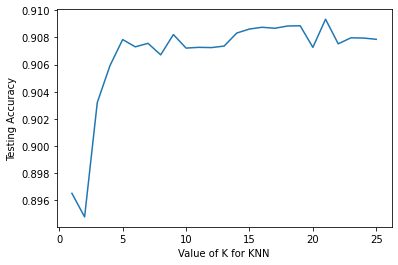

In [ ]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
pip install -U notebook-as-pdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyppeteer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls

IPL_Ball_by_Ball_2008_2021.csv	IPL_Matches_2008_2021.csv  sample_data
IPL_Ball_by_Ball_2022.csv	IPL_Matches_2022.csv


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2803084947012151


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2803084947012151


In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
accuracy=confusion_matrix(y_test,predictions)

In [ ]:
accuracy

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          97,   21],
       [   0, 3310,  455,   75,    0,  728,   63, 1583,  417,    0,    0,
          72,  138],
       [   0, 2520,  530,    0,    0,  835,    0,  661,  588,    0,    0,
          71,  313],
       [   0,  865,    0,    0,    0,  377,    0,  285,   54,    0,    0,
           0,    0],
       [   0,  210,    0,    0,    0,   78,    0,   82,   47,    0,    0,
           0,    0],
       [   0, 1586,   59,    0,    0, 1839,    0, 1227,  536,  115,    0,
         950,  595],
       [   0,    0,  144,    0,    0,  221,    0,  151,    0,    0,    0,
          79,    0],
       [   0, 1388,  182,    0,    0,  992,    0, 3152,  572,  228,    0,
         683,  393],
       [   0, 1069,  339,    0,    0,  788,    0,  501, 1034,    0,    0,
        1250,  615],
       [   0,  403,  142,    0,    0,  544,    0, 1909,  304,  159,    0,
         345, 1210],
       [   0,    0,    0,    0,    0,  457,    0, 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.2803084947012151

In [ ]:
predictions

array([12, 11, 11, ...,  7, 11, 11])

In [ ]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.29      0.48      0.36      6841
           2       0.29      0.10      0.14      5518
           3       0.00      0.00      0.00      1581
           4       0.00      0.00      0.00       417
           5       0.23      0.27      0.25      6907
           6       0.00      0.00      0.00       595
           7       0.27      0.42      0.33      7590
           8       0.22      0.18      0.20      5596
           9       0.22      0.03      0.06      5016
          10       0.00      0.00      0.00      1812
          11       0.32      0.43      0.36      6070
          12       0.35      0.42      0.38      6008

    accuracy                           0.28     54069
   macro avg       0.17      0.18      0.16     54069
weighted avg       0.25      0.28      0.25     54069

